In [60]:
import os
import sys
import pickle
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from bayesmf.scripts.utils.model import run_kfold_xval
from bayesmf.scripts.utils.dataset import make_insilico_dataset, make_downsampled_dataset
from bayesmf.models.cmf import CMF, StochasticCMF

%reload_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
X, _ = make_downsampled_dataset()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
factorizer = CMF(K=15, random_state=22690, init='nmf', verbose=True)
factorizer.fit(X)

/home/sxchao/bayesmf/models/cmf.py:135: RuntimeWarning: invalid value encountered in double_scalars
  chg = (elbo_new - elbo_old) / abs(elbo_old)


Iter: 0, Bound: 13616100.94, Change: nan
Iter: 1, Bound: 13995948.26, Change: 0.02790
Iter: 2, Bound: 13975636.74, Change: -0.00145


CMF(K=15, init='nmf', m=10, max_iters=100, num_steps=1, random_state=22690,
    smoothness=100, step_size=1e-05, tolerance=0.0005, verbose=True)

In [5]:
l = factorizer.l
l.shape

(15, 10)

In [53]:
l = l[idxs, :]
a = l / np.linalg.norm(l, axis=1)[:, np.newaxis]

In [54]:
corr = np.matmul(a ,a.T)
corr.shape

(15, 15)

In [35]:
import matplotlib
matplotlib.__version__

'3.1.1'

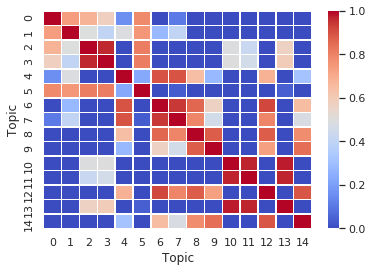

In [55]:
ax = sns.heatmap(corr, cmap='coolwarm', linewidths=.5, vmin=0, vmax=1)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xlabel('Topic')
plt.ylabel('Topic')

plt.show() # ta-da!

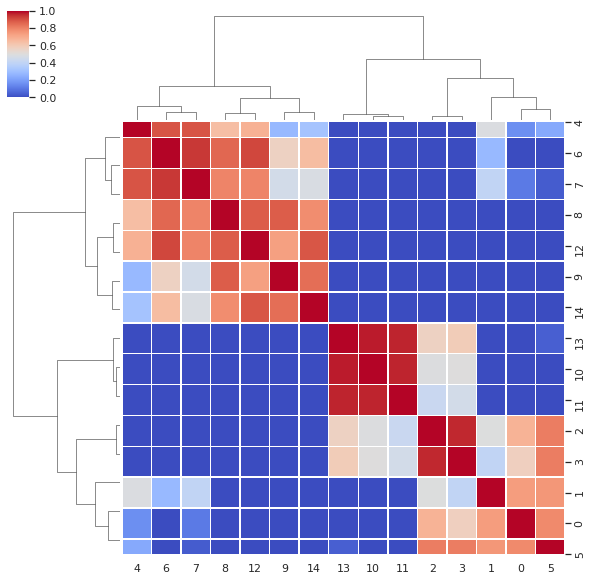

In [56]:
ax = sns.clustermap(corr, cmap='coolwarm', linewidths=.5, vmin=0, vmax=1)

In [42]:
W = np.exp(factorizer.alpha[np.newaxis, :] + np.dot(l, factorizer.u.T)).T # K x D -> D x K
H = factorizer.Eb.T

In [43]:
W.shape, H.shape

((1000, 15), (15, 100))

In [63]:
genes = make_downsampled_dataset(return_genes=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [72]:
K = 15

idxs = np.argsort(np.sum(W, axis=0))[::-1]

for k in idxs:
    idxs = np.argsort(H[k, :])[::-1]
    print(k, genes[idxs[:5]])

0 Index(['GAPDH', 'RPS14', 'RPS3', 'RPS23', 'NEDD8'], dtype='object')
1 Index(['RPS14', 'RPS3', 'RPS23', 'GAPDH', 'NEDD8'], dtype='object')
13 Index(['GAPDH', 'ARL6IP1', 'SPOCK2', 'RPS14', 'RPS23'], dtype='object')
5 Index(['RPS3', 'RPS14', 'GAPDH', 'CD3D', 'RPS23'], dtype='object')
3 Index(['RPS23', 'RPS3', 'GAPDH', 'SUMO2', 'RPS14'], dtype='object')
8 Index(['NPM1', 'RPS23', 'RANBP1', 'SUMO2', 'ATP5O'], dtype='object')
9 Index(['YBX1', 'HMGN1', 'COX6C', 'GAPDH', 'CDK2AP2'], dtype='object')
14 Index(['HMGN1', 'SUMO2', 'GAPDH', 'ATP5I', 'CLIC1'], dtype='object')
11 Index(['GAPDH', 'CLIC1', 'UBB', 'SUMO2', 'COX6C'], dtype='object')
12 Index(['RPS14', 'CD3D', 'GZMK', 'SUMO2', 'RPS3'], dtype='object')
10 Index(['UBB', 'ARL6IP1', 'HMGN1', 'COX6C', 'GAPDH'], dtype='object')
7 Index(['TXNIP', 'NPM1', 'RPS14', 'FYN', 'YBX1'], dtype='object')
2 Index(['RPS14', 'CD52', 'UBB', 'CD3D', 'PNRC1'], dtype='object')
6 Index(['CD3D', 'ACTR3', 'COX6C', 'RPS14', 'GAPDH'], dtype='object')
4 Index(['CD52',

In [69]:
test = np.array([10, 15, 5, 20])
np.argsort(test)[::-1]

array([3, 1, 0, 2])

In [67]:
_, sparsity1 = make_insilico_dataset()
_, sparsity2 = make_downsampled_dataset()
sparsity1, sparsity2

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(0.41266, 0.3361)